In [218]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv


In [219]:
d_train = pd.read_csv("../input/titanic/train.csv")
df_test = pd.read_csv("../input/titanic/test.csv")
df_train = pd.concat([d_train, df_test], axis=0, ignore_index=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


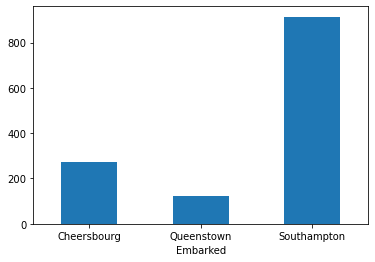

In [220]:
#passengers embarked
df_train['Embarked'].fillna('C', inplace = True)
df_train['Embarked'] = df_train['Embarked'].map({'C':'Cheersbourg', 'S': 'Southampton', 'Q':'Queenstown'})
#df_train['Embarked'].fillna('Southampton', inplace = True)
passenger_embarked = df_train.groupby(['Embarked'])['PassengerId'].count()
passenger_embarked.plot.bar(rot = 0)

In [221]:
#extracting the titles
for name_string in df_train['Name']:
   df_train['Title'] = df_train['Name'].str.extract('([A-Za-z]+)\.', expand=True)

#transform titles which are synonyms
df_train['Title']=df_train['Title'].replace({'Ms':'Miss','Mlle':'Miss','Mme':'Mrs'})

df_train['Title'].value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
Rev           8
Dr            8
Col           4
Major         2
Capt          1
Dona          1
Jonkheer      1
Don           1
Sir           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [222]:
# Noble passengers
df_train['Title']=df_train['Title'].replace(['Sir','Don','Dona','Jonkheer','Lady','Countess'], 'Noble')

# passengers with a higher social standing
df_train['Title']=df_train['Title'].replace(['Dr', 'Rev','Col','Major','Capt'], 'Others')

df_train['Title'].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Others     23
Noble       6
Name: Title, dtype: int64

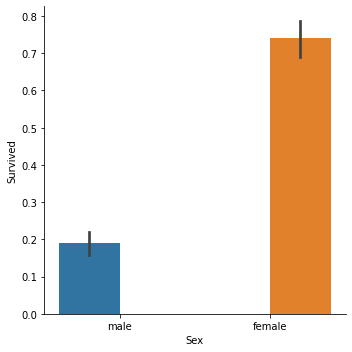

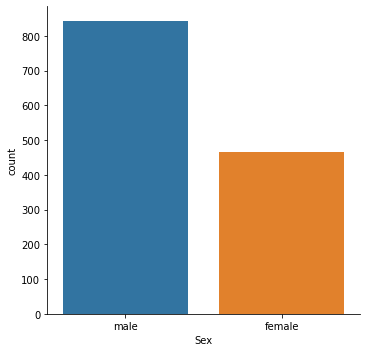

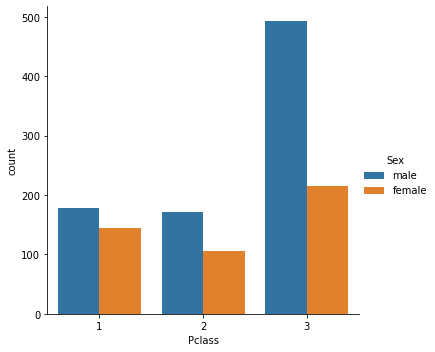

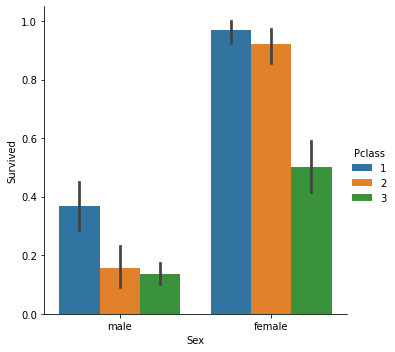

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x = 'Sex',y = 'Survived',hue = 'Sex',kind = 'bar', data = df_train )
sns.catplot(x = 'Sex',kind = 'count',data = df_train)
sns.catplot(x = 'Pclass', hue = 'Sex',kind = 'count',data = df_train)
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df_train)

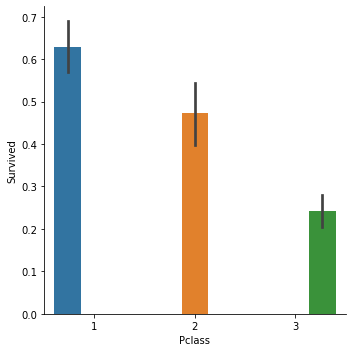

In [224]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Pclass', data = df_train, kind = 'bar')

In [225]:
df_train.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.0
Noble     39.5
Others    49.5
Name: Age, dtype: float64

In [226]:
df_train['Age'][(df_train['Title']== 'Miss') & (df_train['Age']<15)].median()

5.0

In [227]:
df_train['Age'][(df_train['Title']== 'Miss') & (df_train['Age']>=15)].median()

24.0

In [228]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cheersbourg,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,Southampton,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cheersbourg,Noble
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,Southampton,Mr


In [229]:
title_list=df_train.groupby('Title')['Age'].median().index.to_list()
# Filling missing age values 
for title in title_list:
    if title=='Miss':
        # Miss with Parch = 0 and missing age value: set median age >15 to missing values
        df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title) & (df_train['Parch'] == 0), 'Age'] \
        = df_train['Age'][(df_train['Title']== title) & (df_train['Age']>=15)].median()
        
        # Miss with Parch > 0 and missing age value: set median age <15 to missing values
        df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title) & (df_train['Parch'] > 0), 'Age'] \
        = df_train['Age'][(df_train['Title']== title) & (df_train['Age']<15)].median()
        
        # all Misses with Age < 15: set Title to youngMiss 
        df_train.loc[(df_train['Age']<15) & (df_train['Title'] == title), 'Title'] \
        = 'youngMiss'    
                                                 
    else: 
        df_train.loc[(df_train['Age'].isnull()) & (df_train['Title'] == title), 'Age'] \
        = df_train['Age'][(df_train['Title']== title)].median()

In [230]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cheersbourg,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,Southampton,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,Cheersbourg,Noble
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,Southampton,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,Southampton,Mr


In [231]:
data_pre = df_train.drop(['Embarked','Survived','PassengerId','Name','Parch','SibSp','Ticket','Cabin'],axis=1)


In [232]:
data_pre

,Pclass,Sex,Age,Fare,Title
0,3,male,22.0,7.2500,Mr
1,1,female,38.0,71.2833,Mrs
2,3,female,26.0,7.9250,Miss
3,1,female,35.0,53.1000,Mrs
4,3,male,35.0,8.0500,Mr
...,...,...,...,...,...
1304,3,male,29.0,8.0500,Mr
1305,1,female,39.0,108.9000,Noble
1306,3,male,38.5,7.2500,Mr
1307,3,male,29.0,8.0500,Mr


In [233]:
data_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  1309 non-null   int64  
 1   Sex     1309 non-null   object 
 2   Age     1309 non-null   float64
 3   Fare    1308 non-null   float64
 4   Title   1309 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 51.3+ KB


In [234]:
#Pipeline for categorical values
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('cat', OneHotEncoder()),
    ])

In [235]:

data_post = cat_pipeline.fit_transform(data_pre)

In [236]:
X_train = data_post[:len(d_train['Survived']),:].toarray()
y_train = d_train['Survived'].copy().to_numpy() # traget

# test data
X_test = data_post[len(d_train['Survived']):,:].toarray()

In [237]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


svm_rbf = SVC(C = 2, kernel='rbf', gamma= 0.1) 
svm_rbf_scores = cross_val_score(svm_rbf, X_train, y_train, cv=10, scoring='roc_auc')
print(svm_rbf_scores) 
   

[0.87064935 0.92406417 0.72433155 0.9144385  0.90320856 0.88368984
 0.83235294 0.87593583 0.9302139  0.8957672 ]


In [238]:
svm_rbf.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [239]:
print(svm_rbf.predict(X_test))

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [240]:


from xgboost import XGBClassifier



model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [241]:


y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]

In [243]:
from sklearn.metrics import accuracy_score
rmse =  accuracy_score(y_train, y_pred)
print("RMSE: %f" % (rmse))

RMSE: 0.882155


In [244]:
y_pred = model.predict(X_test)

In [245]:
type(y_pred)

numpy.ndarray

In [252]:
submission_cb=pd.DataFrame({'PassengerId':df_test['PassengerId'],'Survived':y_pred})


In [253]:
submission_cb.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [258]:
submission_cb.to_csv('submission_cb1.csv',index=False)